# Assignment 6 - Weather
---
Program that reads the weather data taken in Knock Airport and plots the temperature, the daily mean temperature, and the monthly mean temperature. 

It will also plot data regarding the wind speed, the daily mean wind speed, the daily maximum wind speed and the monthly mean of the daily maximum wind speed.

In [1]:
# Import Pandas library to load the data.
import pandas as pd

In [2]:
# Load DataFrame.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first column starts in line 24.

# Check the first 3 rows.
df.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_12772\2934260067.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first column starts in line 24.


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [3]:
# Import datetime to treat the column "date" as datetime object.
import datetime
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [4]:
# Check if date is now a datetime object.
df["date"]

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]

In [5]:
# Import seaborn to plot.
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Temperature(C) over time'}, xlabel='date', ylabel='temp'>

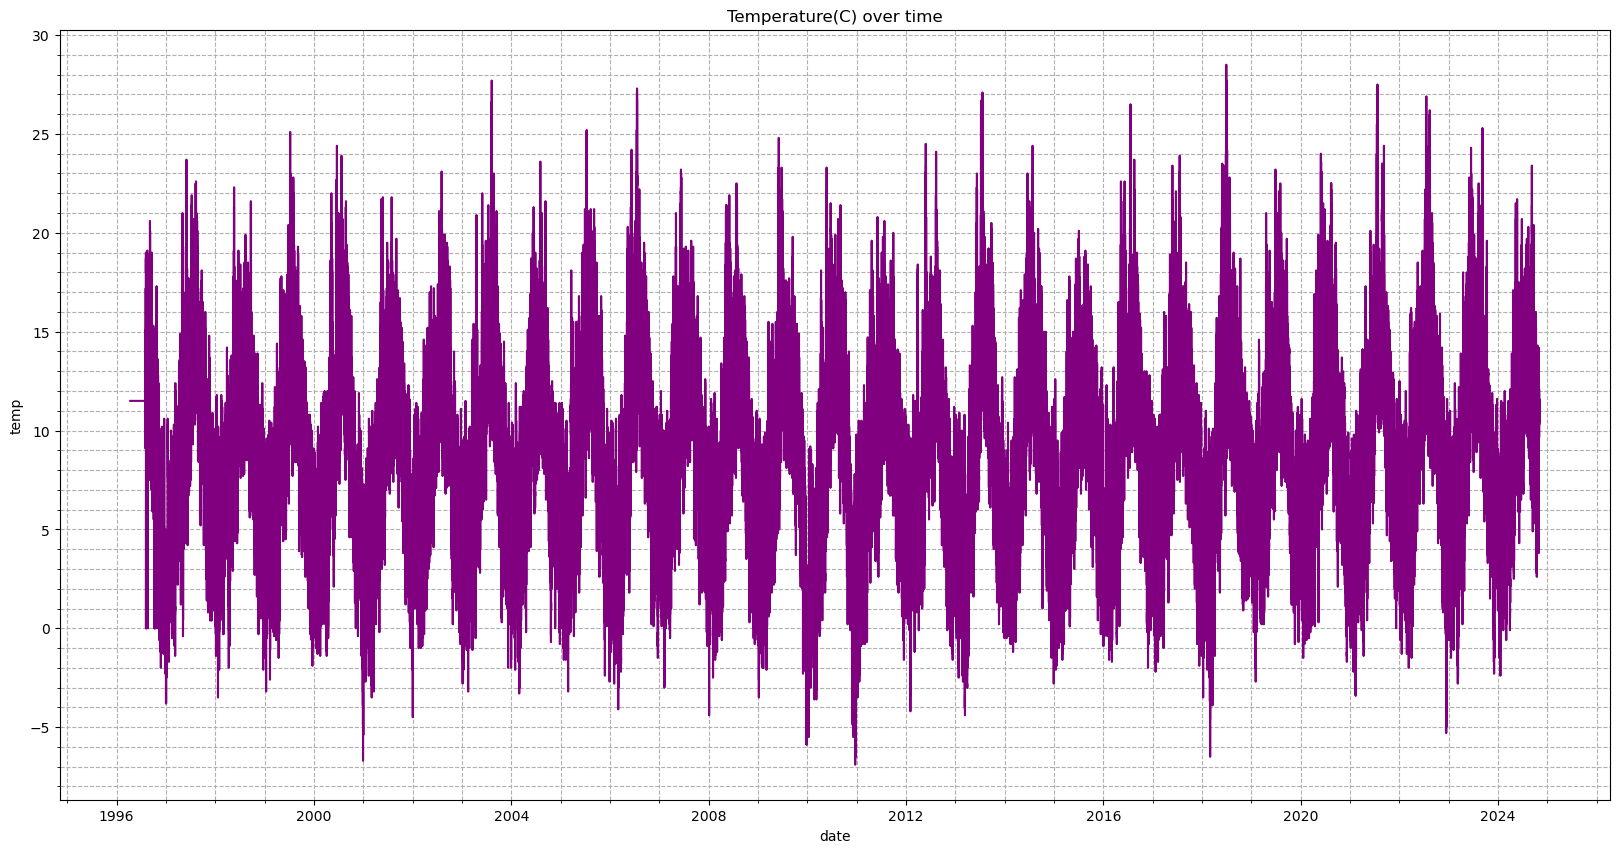

In [6]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = (20, 10)

# Define the grid parameters to use in the plots.
def grid():
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', bottom=True)
    plt.grid(which='both', linestyle='--')

grid()

plt.title("Temperature(C) over time")
sns.lineplot(data=df, x="date", y="temp", color="purple")


# https://mljar.com/blog/matplotlib-change-figure-size/
# https://www.geeksforgeeks.org/customizing-minor-ticks-in-matplotlib-turning-on-minor-ticks-only-on-the-y-axis/
# https://matplotlib.org/stable/users/explain/colors/colors.html

In [7]:
# Calculate the mean temperature for each day.
days= df["date"].dt.strftime("%Y-%m-%d")
daily_mean_temp = df.groupby(days)["temp"].transform("mean")

# Create a new column in the original DataFrame.
df["daily_mean_temp"] = daily_mean_temp

# Check.
df.head(3)

# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html
# https://realpython.com/pandas-groupby/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html
# https://pandas.pydata.org/docs/user_guide/groupby.html#the-transform-method

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_mean_temp
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,25,81,0.0,35000,32,5,11.50
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,25,82,0.0,40000,45,5,12.65
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,80,81,0.0,8000,32,7,12.65


<Axes: title={'center': 'Daily mean temperature(C)'}, xlabel='date', ylabel='daily_mean_temp'>

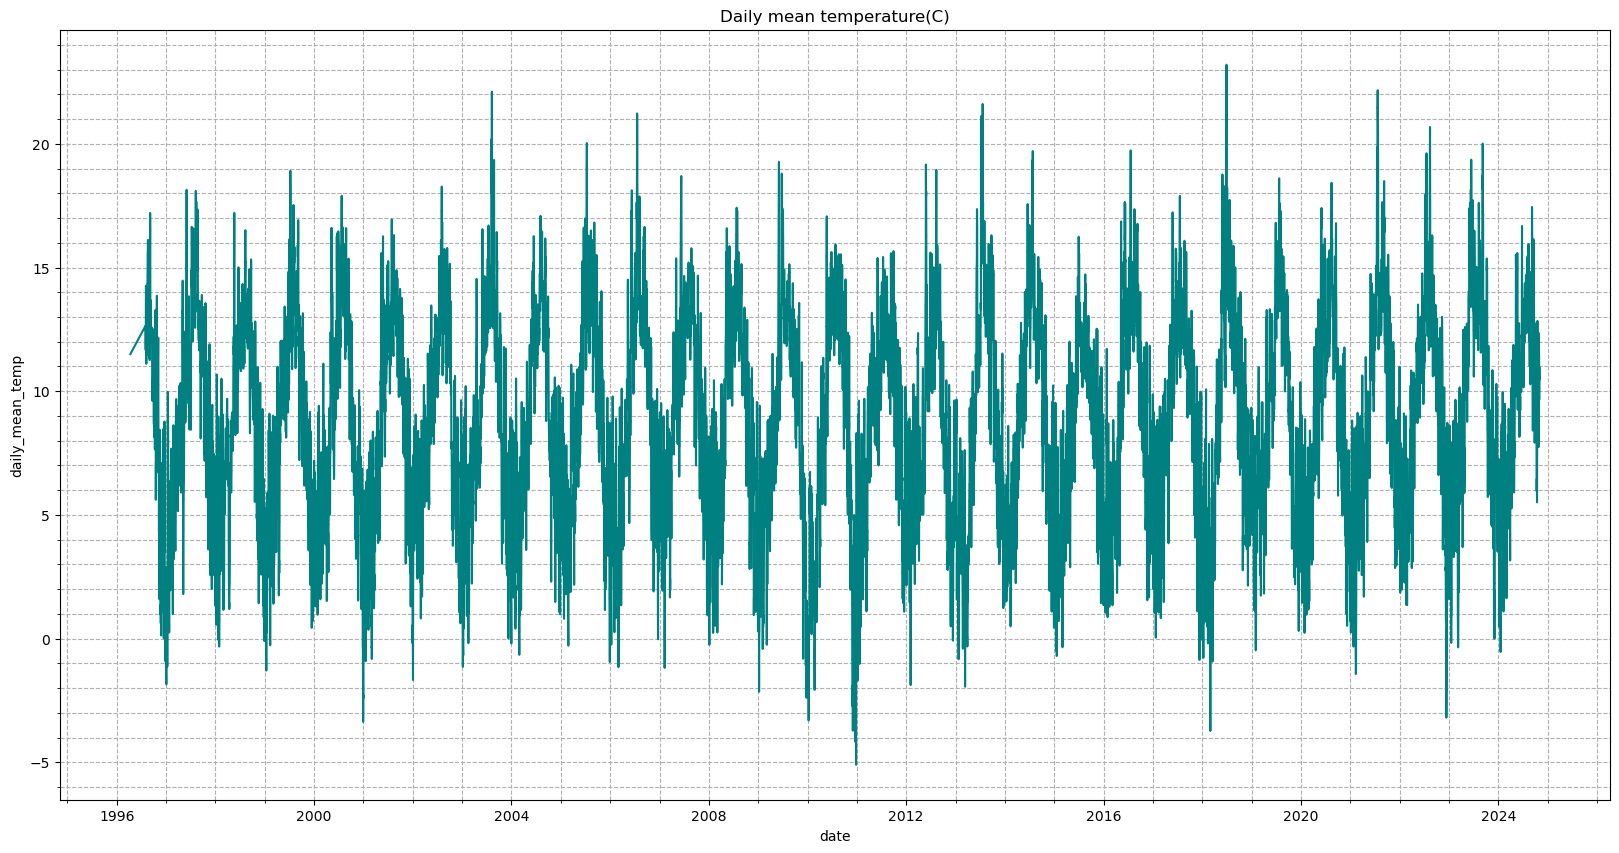

In [8]:
# Plot.
grid()
plt.title("Daily mean temperature(C)")
sns.lineplot(data=df, x="date", y="daily_mean_temp", color="teal")

In [9]:
# Calculate the mean temperature for each month.
months= df["date"].dt.strftime("%Y-%m")
monthly_mean_temp = df.groupby(months)["temp"].transform("mean")

# Create a new column with the monthly mean temperatures.
df["monthly_mean_temp"] = monthly_mean_temp

# check.
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,25,81,0.0,35000,32,5,11.50,11.50
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,25,82,0.0,40000,45,5,12.65,12.65
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,80,81,0.0,8000,32,7,12.65,12.65


<Axes: title={'center': 'Monthly mean temperature(C)'}, xlabel='date', ylabel='monthly_mean_temp'>

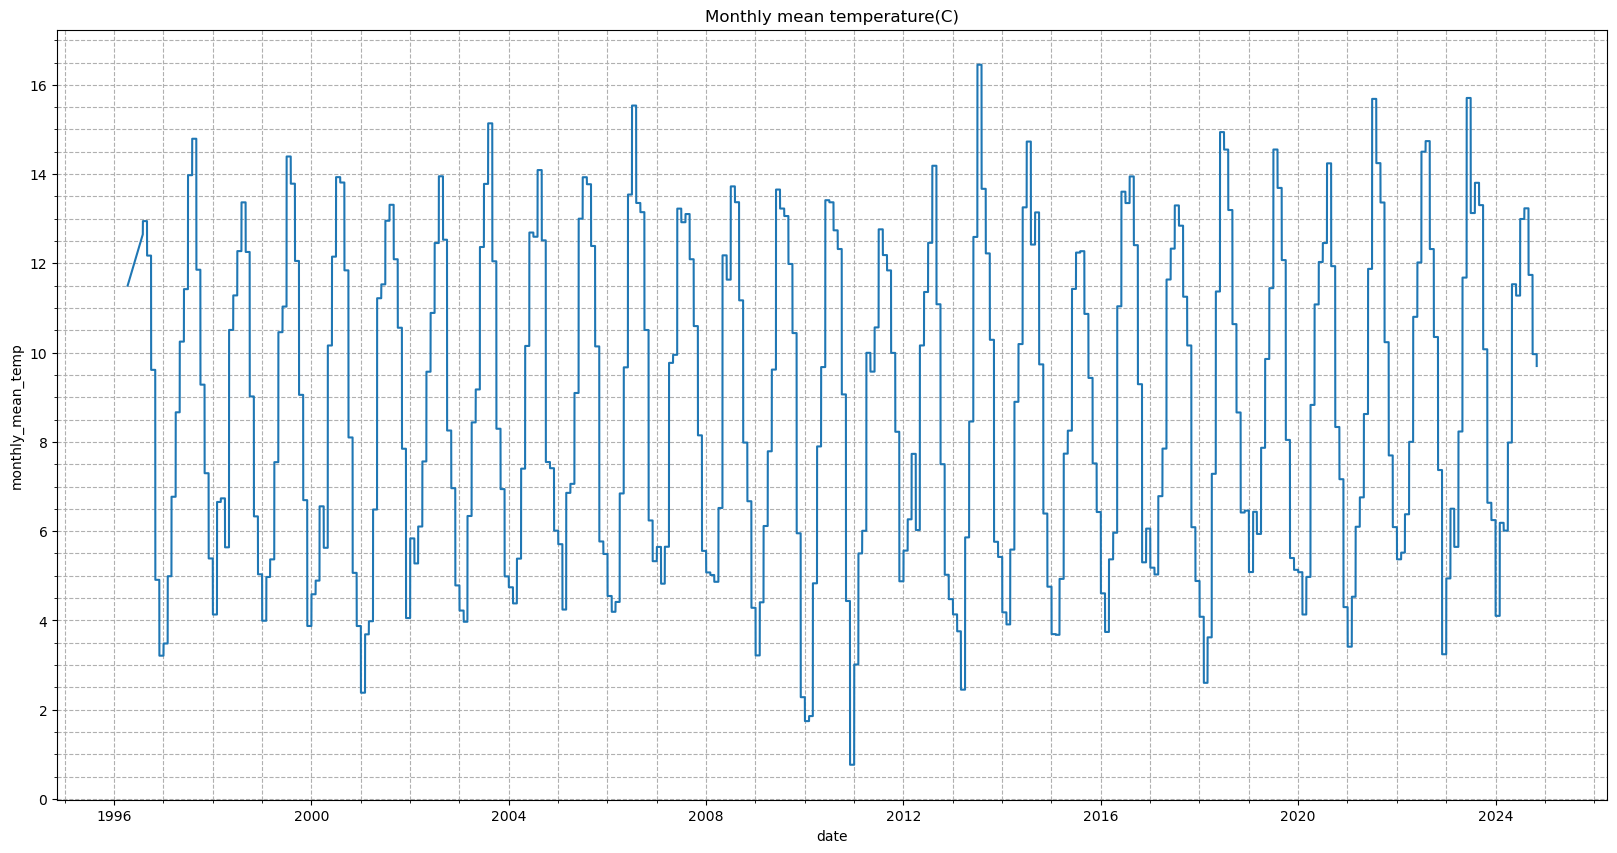

In [10]:
# Plot.
grid()
plt.title("Monthly mean temperature(C)")
sns.lineplot(data=df, x="date", y="monthly_mean_temp")

In [11]:
### Wind speed.
# Drop the empty values.
df.dropna(subset=['wdsp'], inplace=True)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [12]:
# Change the dtype so it will tackle the "TypeError: 'value' must be an instance of str or bytes, not a int".
df["wdsp"] = pd.to_numeric(df["wdsp"], errors="coerce")
df["wdsp"].head(3)

# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# https://stackoverflow.com/questions/64890665/how-do-i-fix-this-type-error-value-must-be-an-instance-of-str-or-bytes-not-a#comment114730210_64890983

0    0.0
1    0.0
2    0.0
Name: wdsp, dtype: float64

<Axes: title={'center': 'Wind speed over time'}, xlabel='date', ylabel='wdsp'>

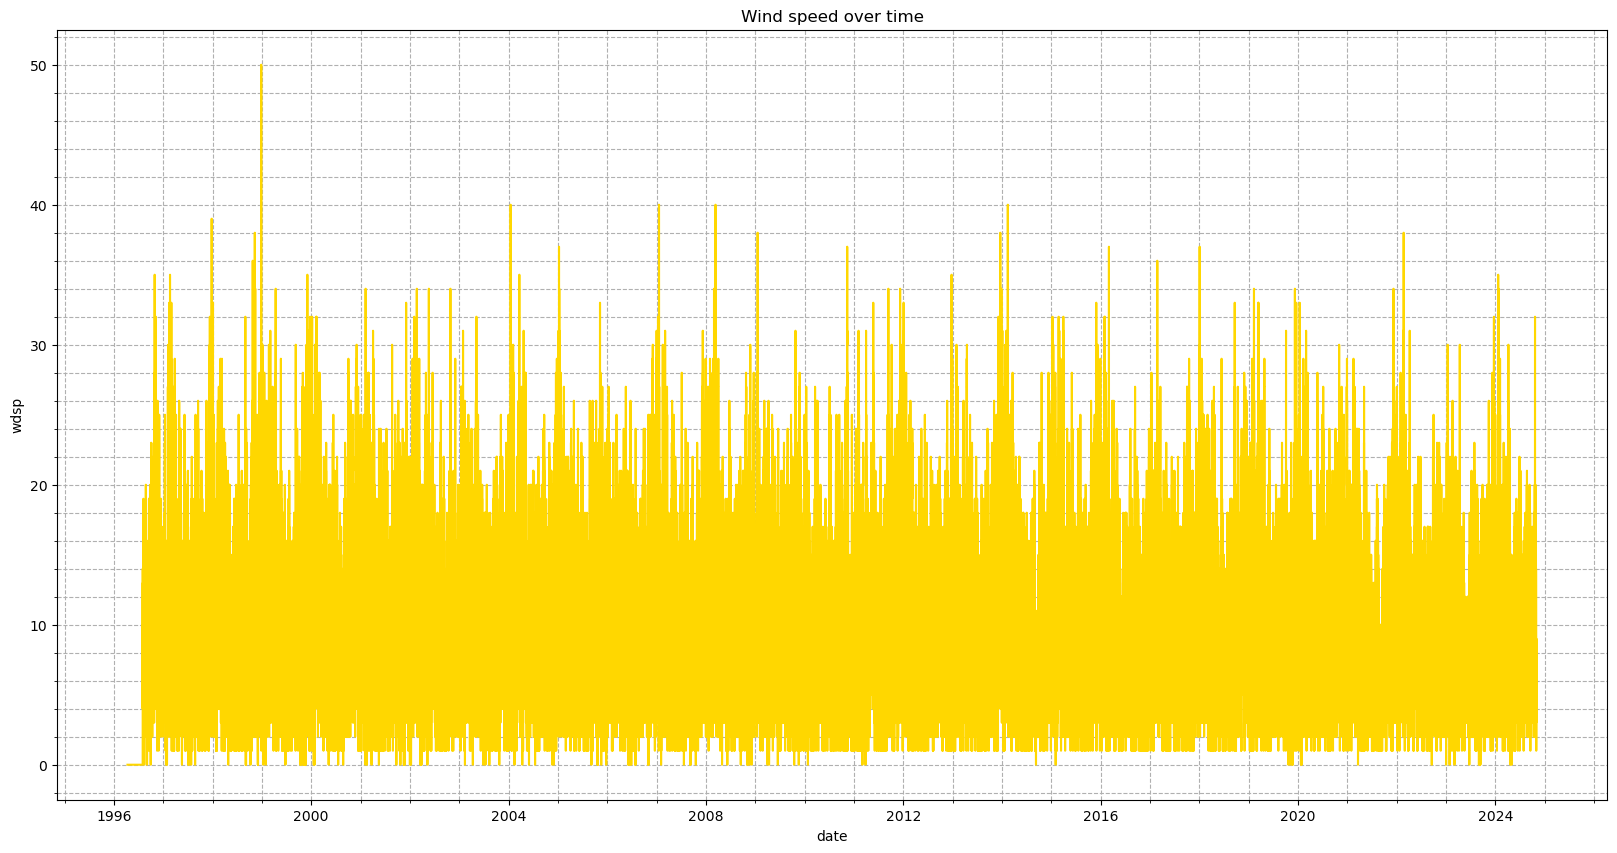

In [13]:
# Plot.
grid()
plt.title("Wind speed over time")
sns.lineplot(data=df, x="date", y="wdsp", color="gold")

In [14]:
# Calculate the daily wind speed mean.
daily_mean_wind = df.groupby(days)["wdsp"].transform("mean")

# Create a new column and check
df["daily_mean_wind"] = daily_mean_wind
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,11.50,11.50,0.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,12.65,12.65,0.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,12.65,12.65,0.0


<Axes: title={'center': 'Daily mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

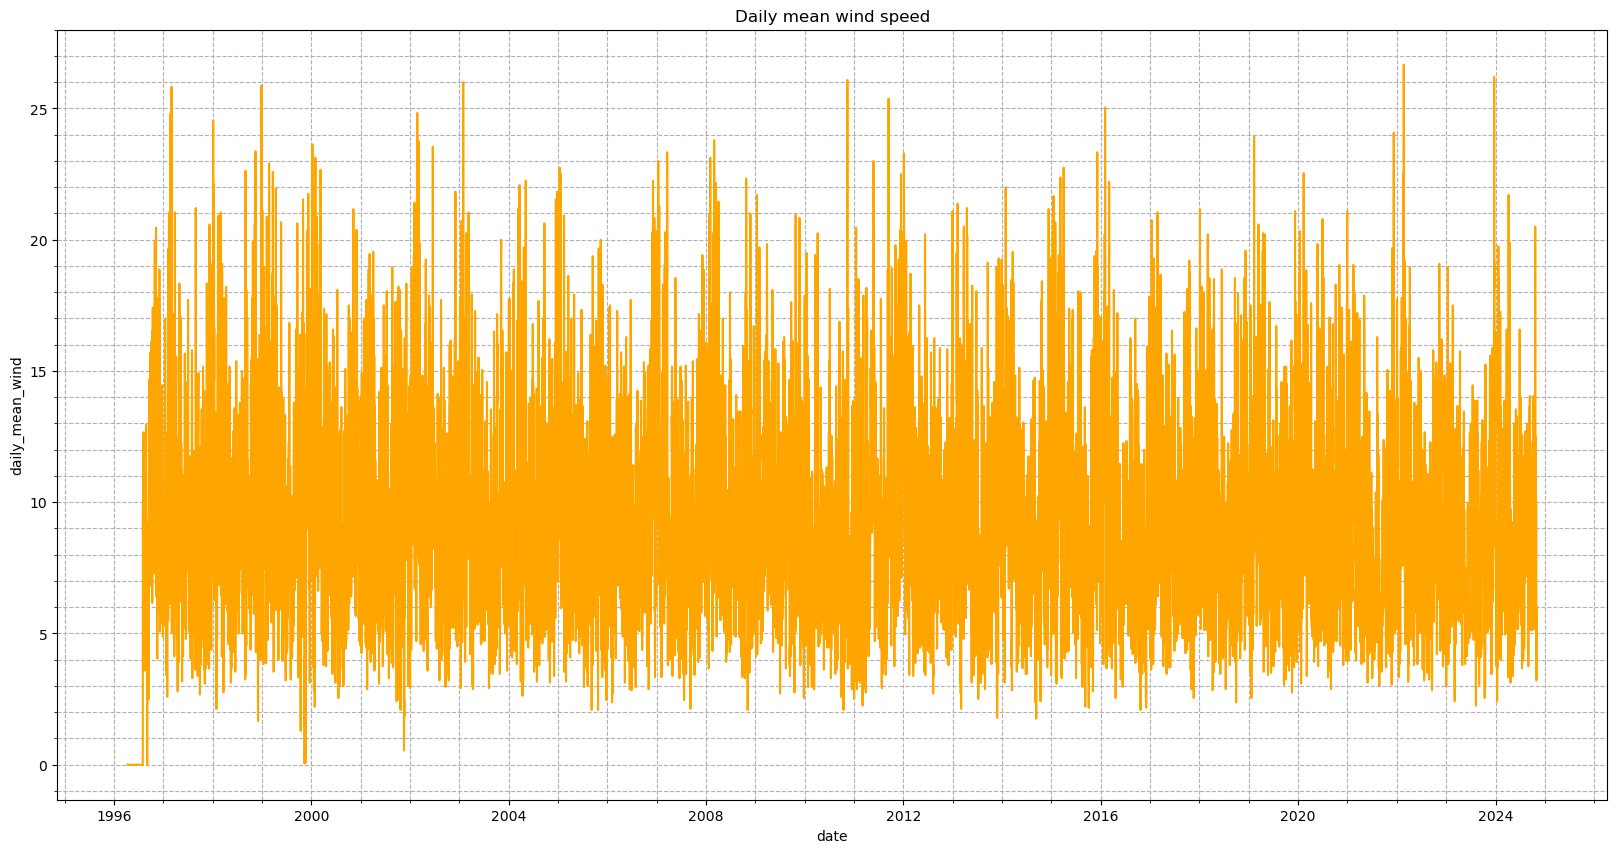

In [15]:
# Plot.
grid()
plt.title("Daily mean wind speed")
sns.lineplot(data=df, x="date", y="daily_mean_wind", color="orange")

In [16]:
# Calculate the daily maximum wind speed.
daily_max_wind = df.groupby(days)["wdsp"].transform("max")

# Create a new column and show.
df["daily_max_wind"] = daily_max_wind
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ww,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind,daily_max_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,25,81,0.0,35000,32,5,11.50,11.50,0.0,0.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,25,82,0.0,40000,45,5,12.65,12.65,0.0,0.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,80,81,0.0,8000,32,7,12.65,12.65,0.0,0.0


<Axes: title={'center': 'Daily maximum wind speed'}, xlabel='date', ylabel='daily_max_wind'>

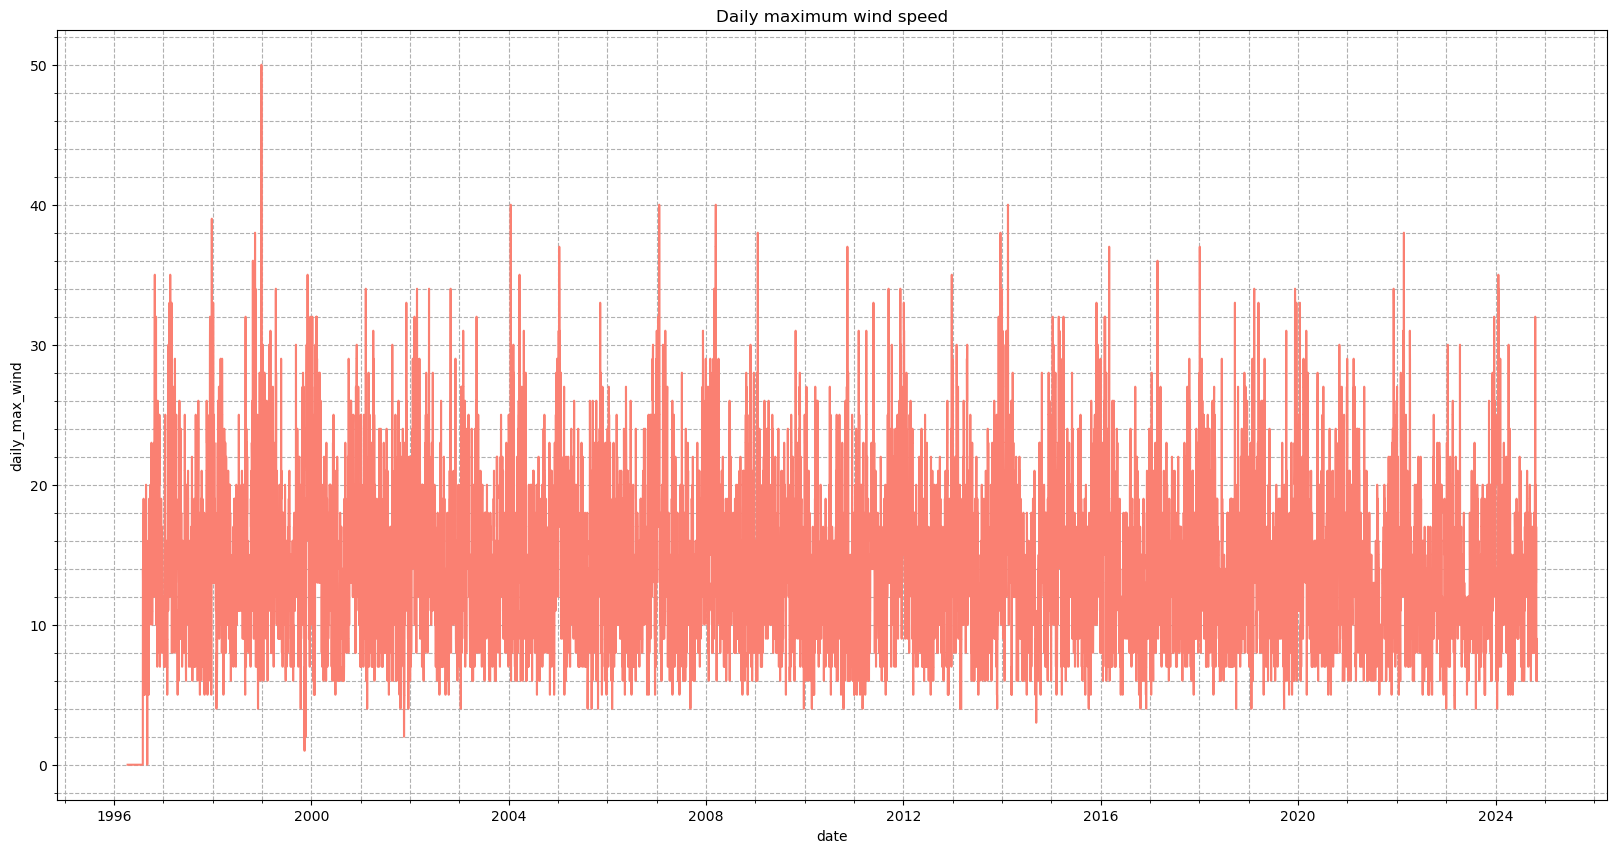

In [17]:
# Plot.
grid()
plt.title("Daily maximum wind speed")
sns.lineplot(data=df, x="date", y="daily_max_wind", color="salmon")

In [18]:
# Calculate the monthly mean of the daily maximum wind speeds. 
monthly_mean_daily_max_wind = df.groupby(months)["daily_max_wind"].transform("mean")

# Create a new column and check.
df["monthly_mean_daily_max_wind"] = monthly_mean_daily_max_wind
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind,daily_max_wind,monthly_mean_daily_max_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,81,0.0,35000,32,5,11.50,11.50,0.0,0.0,0.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,82,0.0,40000,45,5,12.65,12.65,0.0,0.0,0.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,81,0.0,8000,32,7,12.65,12.65,0.0,0.0,0.0


<Axes: title={'center': 'Monthly mean of the daily maximum wind speed'}, xlabel='date', ylabel='monthly_mean_daily_max_wind'>

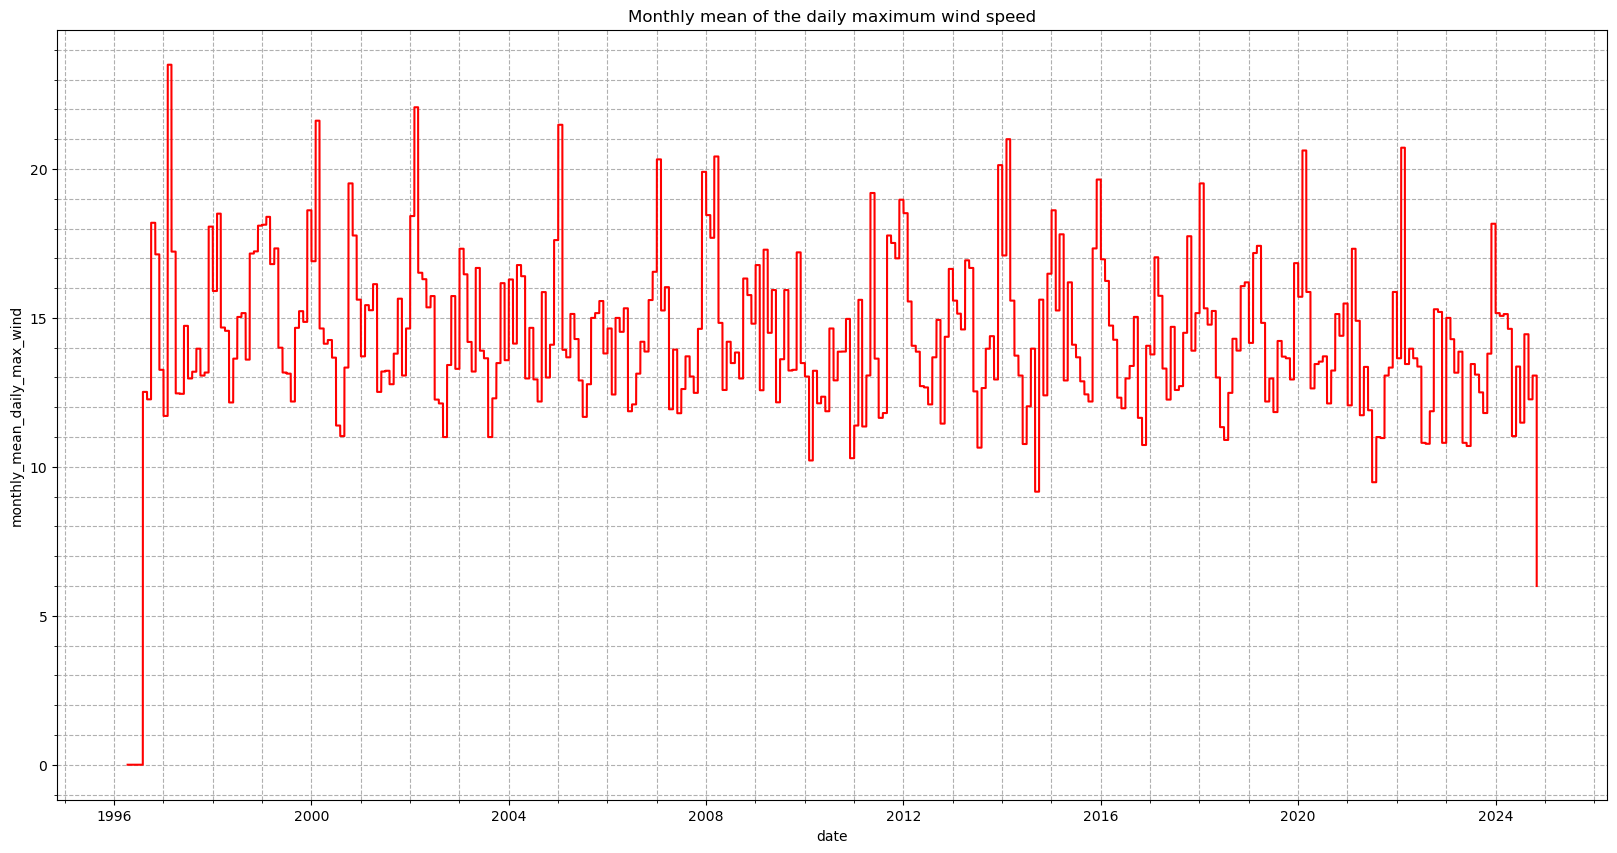

In [19]:
# Plot.
grid()
plt.title("Monthly mean of the daily maximum wind speed")
sns.lineplot(data=df, x="date", y="monthly_mean_daily_max_wind", color="red")

In [20]:
# Analyse all the new data generated.
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind,daily_max_wind,monthly_mean_daily_max_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,81,0.0,35000,32,5,11.500000,11.500000,0.0,0.0,0.000000
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,82,0.0,40000,45,5,12.650000,12.650000,0.0,0.0,0.000000
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,81,0.0,8000,32,7,12.650000,12.650000,0.0,0.0,0.000000
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,82,0.0,28000,35,6,12.650000,12.650000,0.0,0.0,0.000000
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,11,0.0,40000,40,6,12.650000,12.650000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,2024-10-31 20:00:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,,0.0,,0,8,10.554167,9.966263,5.5,9.0,13.064516
247670,2024-10-31 21:00:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,,0.0,,0,8,10.554167,9.966263,5.5,9.0,13.064516
247671,2024-10-31 22:00:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,,0.0,,0,8,10.554167,9.966263,5.5,9.0,13.064516
247672,2024-10-31 23:00:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,,0.0,,0,8,10.554167,9.966263,5.5,9.0,13.064516


_____________
### End